In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../../parameters/params.yaml'
import yaml
import sys
import os
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

#data_folder = doc['data_folder']
#tissues = doc['tissues'].split(',')
#sys.path.append(doc['pipeline_path'])
ref_fa = doc['GENOME_FA']
#anno_gff=doc['annotation']
#mRNA_peak_file = doc["mRNA_peak_file"]
#tss_annotation = doc['tss_annotation']


import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from os.path import join
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
#from Homer import *

homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


/data2/resources/software/homer/v4.11_10242019/bin//homer


In [2]:
os.chdir(doc["results"])

genome="GCF"
save_dir = join("compare_tissues_distance", "GCF")

In [3]:
df = pd.read_csv(join(genome, "eTSS", "TSS.exp.meta.tsv"), sep="\t", index_col=0)
df.head()

,Tissues,cs,CHO ATAC Region,ID,Gene,Gene ID,Transcript,Is Experimental
p1@Bmp4_XM_027386529.1,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi...",0b11,NaN,348823,Bmp4,NaN,XM_027386529.1,1.0
p2@Bmp4_XM_027386529.1,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi...",0b00,NaN,90264,Bmp4,NaN,XM_027386529.1,1.0
p3@Bmp4_XM_027386529.1,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi...",0b00,NaN,181215,Bmp4,NaN,XM_027386529.1,1.0
p1@Bmp4_XM_027386528.1,"BMDMwt,Brain,Spleen,Lung,Pancreas,FemaleReprod...",0b11,NaN,308710,Bmp4,NaN,XM_027386528.1,1.0
p1@Cdkn3_XM_027386531.1,"Brain,Spleen,Lung,CHO,FemaleReproductive,MiscO...",0b11,NaN,237253,Cdkn3,NaN,XM_027386531.1,1.0


In [4]:
txn_df = pickle.load(open(join(genome,"gene_centric_tss/txn_df_tissues.p"), "rb"))
txn_df

,peaks,closest_to_X_numberOfPeaks,bin_-1000_1000,sameStrand_bin_-1000_1000,samples,minDistance,minDistancePeak,maxValue,maxPeakId,maxSample,Chr,Start,End,Strand,gene,transcript,maxSamples,hasGene,Number of SS,Tissues
XM_027386529.1,"[1394, 3038, 17726, 21888, 24414, 35067, 69088...",101,"[90264, 97971, 124234, 181215, 317724, 348823]","[90264, 181215, 348823]","[MiscOrgans_START1_and_MiscOrgans_startinput1,...",63.0,348823,5.91169,348823,NaN,NW_020822366.1,722245,722245,-,Bmp4,XM_027386529.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,3,"Brain,Spleen,Lung,FemaleReproductive,Kidney,Mi..."
XM_027386528.1,"[17698, 163408, 224556, 226028, 268860, 275685...",28,"[163408, 308710]",[308710],"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",27.0,308710,13.5345,308710,NaN,NW_020822366.1,724583,724583,-,Bmp4,XM_027386528.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,1,"BMDMwt,Brain,Spleen,Lung,Pancreas,FemaleReprod..."
XM_027386531.1,"[17679, 17707, 83014, 89129, 99005, 108459, 10...",29,"[138244, 237253]",[237253],"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",74.0,237253,4.0268,237253,NaN,NW_020822366.1,1085509,1085509,+,Cdkn3,XM_027386531.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,1,"Brain,Spleen,Lung,CHO,FemaleReproductive,MiscO..."
XM_027386533.1,"[68904, 137124, 249586, 270147, 335001, 400304...",7,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0,
XM_027386534.1,"[14157, 68988, 69200, 116089, 132667, 167473, ...",17,"[132667, 298307, 350581, 353645]",[298307],"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",88.0,298307,5.86295,298307,NaN,NW_020822366.1,1114325,1114325,-,Cnih1,XM_027386534.1,"[MiscOrgans_START1_and_MiscOrgans_startinput1,...",True,1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XM_027434589.1,[],0,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0,
XM_027434591.1,[],0,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0,
XM_027434593.1,[],0,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0,
XM_027434595.1,"[141900, 207964]",2,[],[],[],inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],False,0,


In [5]:
tissue_expr = pd.read_csv(join(genome, "tissues_collapse/tissues.merge.peaksexpression"), sep="\t", index_col=0)
tissue_expr.head()

,MiscOrgans,Liver,Brain,Lung,Heart,CHO,Pancreas,BMDM1hKLA,FemaleReproductive,Muscle,Kidney,Spleen,BMDMwt
0,0.705,0.0,0.790000,2.180000,0.835,26.996,0.000,84.2,0.630,0.715,2.130000,0.000,0.00
1,3.975,1.1,1.608571,16.596667,0.000,0.000,0.000,0.0,4.265,0.545,1.050000,3.385,0.00
2,0.705,0.0,1.887429,2.386667,0.000,19.044,1.490,0.0,4.025,1.100,1.870000,1.255,5.66
3,3.025,0.0,3.914286,1.633333,0.835,1.680,2.385,0.0,6.000,1.495,1.153333,2.875,2.45
4,112.050,29.7,189.308571,50.966667,25.600,20.292,95.500,0.0,136.550,124.150,43.640000,88.550,3.39


## Number of eTSS promoters and how many tissues seen in each

In [6]:
gene_alt_distribution = pd.DataFrame(index=df["Gene"].unique(), columns=["Number of promoters", "promoter distribution"])
for ind, val in df.groupby("Gene"):
    print(ind)
    val["Num Tissues"] = val["Tissues"].apply(lambda x: len(x.split(",")))
    gene_alt_distribution.at[ind, "Number of promoters"] =  len(val)
    gene_alt_distribution.at[ind, "promoter distribution"] = np.sort(val["Num Tissues"].values)[::-1]
gene_alt_distribution["Number of promoters"] = gene_alt_distribution["Number of promoters"].fillna(0)
gene_alt_distribution = gene_alt_distribution[~(gene_alt_distribution.index.isnull())]

A1cf
A4galt
Aaas
Aacs
Aadac
Aadacl3
Aagab
Aak1
Aamdc
Aamp
Aar2
Aars
Aarsd1
Aasdh
Aass
Aatf
Aatk
Abat
Abca1
Abca2
Abca3
Abca5
Abca7
Abca9
Abcb1
Abcb10
Abcb11
Abcb1b
Abcb4
Abcb6
Abcb7
Abcb8
Abcb9
Abcc1
Abcc10
Abcc2
Abcc3
Abcc4
Abcc5
Abcc6
Abcc8
Abcc9
Abcd1
Abcd2
Abcd3
Abcd4
Abce1
Abcf1
Abcf2
Abcf3
Abcg1
Abcg2
Abcg4
Abcg5
Abcg8
Abhd1
Abhd10
Abhd11
Abhd12
Abhd13
Abhd14a
Abhd14b
Abhd16a
Abhd17a
Abhd17b
Abhd17c
Abhd18
Abhd2
Abhd3
Abhd5
Abhd6
Abhd8
Abi1
Abi2
Abi3
Abl1
Abl2
Ablim1
Ablim2
Abo
Abr
Abracl
Abraxas1
Abt1
Abtb1
Abtb2
Acaa2
Acacb
Acad10
Acad11
Acad9
Acadl
Acadm
Acads
Acadsb
Acadvl
Acap1
Acap2
Acap3
Acat1
Acbd3
Acbd4
Acbd5
Acbd6
Acbd7
Accs
Acd
Ace
Ace2
Acer1
Acer2
Acer3
Ache
Ackr3
Ackr4
Acmsd
Aco1
Aco2
Acod1
Acot11
Acot12
Acot13
Acot6
Acot7
Acot8
Acot9
Acox1
Acox2
Acox3
Acoxl
Acp1
Acp2
Acp5
Acp6
Acpp
Acsbg2
Acsf2
Acsf3
Acsl1
Acsl3
Acsl4
Acsl5
Acsl6
Acsm3
Acsm5
Acss1
Acss2
Acss3
Acta1
Acta2
Actc1
Actg2
Actl6a
Actl6b
Actn1
Actn2
Actn3
Actn4
Actr10
Actr1a
Actr1b
Actr2


/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Actr3
Actr3b
Actr5
Actr6
Actr8
Actrt3
Acvr1
Acvr1c
Acvr2a
Acvr2b
Acy1
Acy3
Acyp1
Acyp2
Ada
Adal
Adam10
Adam11
Adam12
Adam15
Adam17
Adam19
Adam22
Adam23
Adam33
Adam9
Adamdec1
Adamts1
Adamts12
Adamts13
Adamts14
Adamts15
Adamts16
Adamts17
Adamts18
Adamts19
Adamts2
Adamts3
Adamts4
Adamts5
Adamts6
Adamts7
Adamts9
Adamtsl4
Adamtsl5
Adap1
Adap2
Adar
Adarb1
Adat1
Adat2
Adat3
Adck1
Adck2
Adck5
Adcy1
Adcy10
Adcy2
Adcy3
Adcy4
Adcy5
Adcy6
Adcy7
Adcy9
Adcyap1
Adcyap1r1
Add1
Add2
Adgra1
Adgra2
Adgra3
Adgrb1
Adgrb2
Adgrb3
Adgrd1
Adgre1
Adgre5
Adgrf1
Adgrf4
Adgrf5
Adgrg1
Adgrg3
Adgrg5
Adgrg6
Adgrl1
Adgrl2
Adgrl3
Adgrl4
Adgrv1
Adh5
Adh7
Adhfe1
Adi1
Adig
Adipoq
Adipor1
Adipor2
Adk
Adm
Adm2
Adnp
Adnp2
Adora1
Adora2a
Adora2b
Adpgk
Adprh
Adprm
Adra1a
Adra1b
Adra2b
Adra2c
Adrb2
Adrb3
Adrm1
Adsl
Adss
Adssl1
Adtrp
Aebp1
Aebp2
Aen
Aes
Afap1
Afap1l1
Afap1l2
Afdn
Aff1
Aff2
Aff3
Aff4
Afg1l
Afg3l2
Afm
Afmid
Aftph
Aga
Agap2
Agap3
Agbl2
Agbl3
Agbl5
Ager
Agfg1
Agfg2
Aggf1
Agk
Agl
Agmat
Agmo
Ago2
Ago3
Agpat1
Agpat2
Ag

CUNH16orf71
CUNH16orf74
CUNH16orf86
CUNH16orf89
CUNH16orf90
CUNH16orf92
CUNH16orf96
CUNH17orf49
CUNH17orf53
CUNH17orf58
CUNH17orf64
CUNH17orf67
CUNH17orf78
CUNH17orf97
CUNH18orf54
CUNH19orf12
CUNH19orf25
CUNH19orf38
CUNH19orf47
CUNH19orf54
CUNH19orf57
CUNH19orf66
CUNH19orf71
CUNH19orf81
CUNH19orf84
CUNH1orf105
CUNH1orf109
CUNH1orf122
CUNH1orf127
CUNH1orf131
CUNH1orf146
CUNH1orf158
CUNH1orf167
CUNH1orf174
CUNH1orf189
CUNH1orf194
CUNH1orf198
CUNH1orf210
CUNH1orf216
CUNH1orf232
CUNH1orf35
CUNH1orf52
CUNH1orf54
CUNH1orf74
CUNH1orf87
CUNH20orf141
CUNH20orf173
CUNH20orf96
CUNH21orf58
CUNH21orf62
CUNH22orf15
CUNH2orf40
CUNH2orf50
CUNH2orf68
CUNH2orf69
CUNH2orf70
CUNH2orf80
CUNH2orf88
CUNH3orf18
CUNH3orf33
CUNH3orf38
CUNH3orf52
CUNH3orf62
CUNH3orf70
CUNH3orf86
CUNH4orf19
CUNH4orf3
CUNH4orf33
CUNH4orf54
CUNH5orf15
CUNH5orf24
CUNH5orf30
CUNH5orf49
CUNH5orf52
CUNH6orf118
CUNH6orf132
CUNH6orf203
CUNH6orf222
CUNH6orf226
CUNH6orf47
CUNH7orf31
CUNH7orf50
CUNH7orf57
CUNH8orf33
CUNH8orf34
CUNH8orf58
CU

Csf2
Csf2rb
Csf3
Csf3r
Csgalnact1
Csgalnact2
Csnk1a1
Csnk1d
Csnk1g1
Csnk1g2
Csnk1g3
Csnk2a1
Csnk2a2
Csnk2b
Cspg4
Cspg5
Csrnp1
Csrnp2
Csrp1
Csrp2
Csrp3
Cst7
Cstb
Cstf1
Cstf2t
Cstf3
Ctbp1
Ctbp2
Ctc1
Ctcf
Ctdnep1
Ctdp1
Ctdsp1
Ctdsp2
Ctdspl
Ctdspl2
Cth
Cthrc1
Ctif
Ctla4
Ctnna1
Ctnna2
Ctnna3
Ctnnal1
Ctnnb1
Ctnnbip1
Ctnnbl1
Ctnnd1
Ctnnd2
Ctns
Ctps1
Ctps2
Ctr9
Ctrc
Ctrl
Ctsa
Ctsb
Ctsc
Ctsd
Ctsf
Ctsh
Ctso
Ctss
Ctsw
Ctsz
Cttn
Cttnbp2
Cttnbp2nl
Ctu1
Ctxn2
Ctxn3
Cubn
Cuedc2
Cul1
Cul2
Cul4a
Cul4b
Cul5
Cul7
Cul9
Cuta
Cutc
Cux1
Cuzd1
Cwc15
Cwc22
Cwc25
Cwc27
Cwf19l1
Cwf19l2
Cwh43
Cx3cl1
Cx3cr1
Cxadr
Cxcl1
Cxcl10
Cxcl11
Cxcl12
Cxcl14
Cxcl16
Cxcl6
Cxcl9
Cxcr2
Cxcr3
Cxcr4
Cxcr5
Cxxc1
Cyfip2
Cygb
Cyhr1
Cyld
Cyp2a14
Cyp2a15
Cyp7a1
Cyren
Cys1
Cysltr1
Cysltr2
Cyth1
Cyth2
Cyth3
Cyth4
Cytip
Cytl1
Cyyr1
Czib
D2hgdh
Daam1
Daam2
Dab1
Dab2
Dab2ip
Dach1
Dact2
Dad1
Dag1
Dagla
Daglb
Dalrd3
Dap3
Dapk1
Dapk2
Dapk3
Dapl1
Dapp1
Dars
Dars2
Daw1
Daxx
Dazap1
Dazap2
Dbf4
Dbi
Dbn1
Dbndd2
Dbnl
Dbp
Dbr1
Dcaf1
Dcaf10
Dcaf11
Dca

Ficd
Fig4
Fign
Fignl1
Filip1
Filip1l
Fip1l1
Fis1
Fitm1
Fitm2
Fkbp10
Fkbp11
Fkbp14
Fkbp15
Fkbp1a
Fkbp1b
Fkbp2
Fkbp3
Fkbp4
Fkbp5
Fkbp7
Fkbp8
Fkbp9
Fktn
Flad1
Flcn
Fli1
Flii
Flna
Flnb
Flnc
Flot1
Flot2
Flrt2
Flrt3
Flt1
Flt3
Flt3lg
Flt4
Flvcr1
Flvcr2
Flywch1
Flywch2
Fmn1
Fmn2
Fmnl1
Fmnl2
Fmnl3
Fmo1
Fmo2
Fmo4
Fmo5
Fmod
Fmr1
Fn1
Fn3k
Fn3krp
Fnbp1
Fnbp1l
Fnbp4
Fndc1
Fndc10
Fndc11
Fndc3a
Fndc3b
Fndc4
Fndc5
Fnip1
Fnip2
Fnta
Fntb
Focad
Folr1
Fopnl
Fos
Fosb
Fosl1
Fosl2
Foxa1
Foxa2
Foxf1
Foxf2
Foxg1
Foxh1
Foxi1
Foxj1
Foxj2
Foxj3
Foxk1
Foxk2
Foxm1
Foxn2
Foxn3
Foxo1
Foxo3
Foxo4
Foxo6
Foxp1
Foxp2
Foxp4
Foxred1
Foxs1
Fpgt
Fpr1
Frat1
Frem2
Frg1
Frk
Frmd3
Frmd4a
Frmd4b
Frmd5
Frmd6
Frmd8
Frmpd1
Frmpd2
Frrs1
Frrs1l
Frs2
Frs3
Fry
Fryl
Frzb
Fsbp
Fscn1
Fsd1
Fsd1l
Fsd2
Fsip1
Fsip2
Fst
Fstl1
Fstl3
Ftcd
Fth1
Ftl
Fto
Ftsj1
Ftsj3
Fubp1
Fubp3
Fuca1
Fuca2
Fuk
Fundc1
Fundc2
Fuom
Fus
Fut1
Fut10
Fut11
Fut4
Fut7
Fut8
Fuz
Fxn
Fxr1
Fxr2
Fxyd2
Fxyd6
Fyb1
Fyb2
Fyco1
Fyn
Fyttd1
Fzd1
Fzd10
Fzd2
Fzd3
Fzd4
Fzd5
Fzd6
Fzd7
Fzr1
G

Jak3
Jakmip1
Jakmip2
Jam3
Jaml
Jarid2
Jazf1
Jcad
Jchain
Jdp2
Jhy
Jkamp
Jmjd1c
Jmjd4
Jmjd6
Jmjd7
Jmjd8
Jmy
Josd1
Josd2
Jph1
Jph2
Jph3
Jph4
Jpt1
Jpt2
Jrk
Jrkl
Jsrp1
Jtb
Junb
Jup
Kank1
Kank2
Kank3
Kank4
Kansl1l
Kansl2
Kansl3
Kars
Kat2a
Kat2b
Kat5
Kat6a
Kat6b
Kat7
Kat8
Katna1
Katnal1
Katnal2
Katnb1
Katnbl1
Kazald1
Kazn
Kbtbd12
Kbtbd13
Kbtbd2
Kbtbd3
Kbtbd4
Kbtbd8
Kcmf1
Kcna1
Kcna2
Kcna3
Kcna5
Kcna6
Kcnab2
Kcnb1
Kcnc2
Kcnc4
Kcnd2
Kcnd3
Kcne2
Kcne3
Kcne4
Kcng1
Kcng2
Kcng3
Kcnh2
Kcnh3
Kcnh4
Kcnh5
Kcnh6
Kcnh8
Kcnip2
Kcnip3
Kcnj1
Kcnj10
Kcnj11
Kcnj12
Kcnj15
Kcnj16
Kcnj2
Kcnj3
Kcnj4
Kcnj5
Kcnj8
Kcnj9
Kcnk1
Kcnk12
Kcnk13
Kcnk15
Kcnk2
Kcnk3
Kcnk5
Kcnk7
Kcnma1
Kcnmb1
Kcnmb3
Kcnmb4
Kcnn1
Kcnn4
Kcnq2
Kcnq5
Kcnrg
Kcns3
Kcnt1
Kcnt2
Kcnv2
Kctd1
Kctd10
Kctd11
Kctd13
Kctd15
Kctd16
Kctd17
Kctd18
Kctd20
Kctd21
Kctd3
Kctd5
Kctd6
Kctd7
Kctd8
Kctd9
Kdelc1
Kdelc2
Kdelr1
Kdelr2
Kdelr3
Kdf1
Kdm1a
Kdm1b
Kdm2a
Kdm2b
Kdm3a
Kdm3b
Kdm4a
Kdm4b
Kdm4c
Kdm5a
Kdm5b
Kdm5c
Kdm6a
Kdm6b
Kdm7a
Kdm8
Kdr
Kdsr
Keap1
Kel
Khdc4
Khdrb

LOC100760123
LOC100760153
LOC100760155
LOC100760157
LOC100760161
LOC100760187
LOC100760208
LOC100760209
LOC100760212
LOC100760218
LOC100760245
LOC100760251
LOC100760261
LOC100760293
LOC100760306
LOC100760308
LOC100760309
LOC100760318
LOC100760321
LOC100760352
LOC100760353
LOC100760372
LOC100760374
LOC100760395
LOC100760411
LOC100760422
LOC100760423
LOC100760433
LOC100760484
LOC100760504
LOC100760537
LOC100760538
LOC100760554
LOC100760563
LOC100760567
LOC100760601
LOC100760619
LOC100760635
LOC100760658
LOC100760661
LOC100760666
LOC100760690
LOC100760727
LOC100760730
LOC100760748
LOC100760787
LOC100760792
LOC100760794
LOC100760811
LOC100760815
LOC100760824
LOC100760829
LOC100760837
LOC100760909
LOC100760938
LOC100760941
LOC100760949
LOC100760951
LOC100760954
LOC100760991
LOC100761009
LOC100761048
LOC100761061
LOC100761082
LOC100761100
LOC100761102
LOC100761179
LOC100761204
LOC100761268
LOC100761274
LOC100761290
LOC100761311
LOC100761373
LOC100761404
LOC100761433
LOC100761451
LOC100761465

LOC100773005
LOC100773006
LOC100773020
LOC100773031
LOC100773059
LOC100773073
LOC100773089
LOC100773095
LOC100773119
LOC100773141
LOC100773144
LOC100773147
LOC100773172
LOC100773177
LOC100773204
LOC100773221
LOC100773237
LOC100773244
LOC100773249
LOC100773255
LOC100773256
LOC100773257
LOC100773299
LOC100773300
LOC100773314
LOC100773325
LOC100773326
LOC100773349
LOC100773351
LOC100773370
LOC100773381
LOC100773384
LOC100773391
LOC100773414
LOC100773418
LOC100773429
LOC100773431
LOC100773433
LOC100773435
LOC100773455
LOC100773462
LOC100773511
LOC100773521
LOC100773522
LOC100773524
LOC100773525
LOC100773531
LOC100773542
LOC100773545
LOC100773565
LOC100773571
LOC100773575
LOC100773579
LOC100773612
LOC100773614
LOC100773619
LOC100773622
LOC100773640
LOC100773648
LOC100773668
LOC100773669
LOC100773672
LOC100773673
LOC100773719
LOC100773725
LOC100773748
LOC100773769
LOC100773783
LOC100773795
LOC100773817
LOC100773822
LOC100773829
LOC100773832
LOC100773835
LOC100773851
LOC100773868
LOC100773886

LOC113835495
LOC113835514
LOC113835519
LOC113835543
LOC113835548
LOC113835615
LOC113835636
LOC113835641
LOC113835643
LOC113835651
LOC113835655
LOC113835663
LOC113835676
LOC113835685
LOC113835692
LOC113835711
LOC113835792
LOC113835797
LOC113835800
LOC113835828
LOC113835833
LOC113835842
LOC113835853
LOC113835857
LOC113835883
LOC113835903
LOC113835910
LOC113835924
LOC113835939
LOC113835958
LOC113836000
LOC113836005
LOC113836007
LOC113836021
LOC113836024
LOC113836085
LOC113836092
LOC113836094
LOC113836095
LOC113836103
LOC113836160
LOC113836173
LOC113836174
LOC113836182
LOC113836212
LOC113836246
LOC113836257
LOC113836269
LOC113836303
LOC113836304
LOC113836305
LOC113836306
LOC113836307
LOC113836308
LOC113836309
LOC113836310
LOC113836327
LOC113836331
LOC113836349
LOC113836353
LOC113836369
LOC113836375
LOC113836376
LOC113836408
LOC113836414
LOC113836417
LOC113836420
LOC113836423
LOC113836427
LOC113836465
LOC113836467
LOC113836469
LOC113836478
LOC113836514
LOC113836518
LOC113836523
LOC113836527

Mknk2
Mkrn1
Mkrn2
Mkrn3
Mks1
Mkx
Mlec
Mlf1
Mlf2
Mlh1
Mlip
Mlkl
Mllt1
Mllt10
Mllt11
Mllt3
Mllt6
Mlph
Mlst8
Mlx
Mlxip
Mlxipl
Mlycd
Mmd
Mmd2
Mme
Mmgt1
Mmp10
Mmp12
Mmp13
Mmp14
Mmp15
Mmp16
Mmp17
Mmp19
Mmp2
Mmp21
Mmp24
Mmp24os
Mmp25
Mmp27
Mmp28
Mmp7
Mmp8
Mmp9
Mmrn2
Mms19
Mms22l
Mmut
Mn1
Mnat1
Mnd1
Mns1
Mnt
Moap1
Mob1a
Mob1b
Mob2
Mob3a
Mob3b
Mob3c
Mobp
Mocs1
Mocs2
Mog
Mogat1
Mogat2
Mogat3
Mogs
Mok
Mon1a
Mon1b
Mon2
Morc2
Morc3
Morc4
Morf4l1
Morf4l2
Morn1
Morn2
Morn3
Morn4
Morn5
Mosmo
Mospd1
Mospd2
Mospd3
Mov10
Moxd1
Mpc1
Mpc2
Mpdu1
Mpdz
Mpeg1
Mpg
Mphosph10
Mphosph6
Mphosph8
Mphosph9
Mpi
Mpig6b
Mplkip
Mpnd
Mpo
Mpp1
Mpp2
Mpp3
Mpp5
Mpp6
Mpp7
Mpped1
Mpped2
Mprip
Mpst
Mpv17
Mpv17l
Mpv17l2
Mpz
Mpzl1
Mpzl2
Mpzl3
Mrap
Mrap2
Mras
Mrc1
Mrc2
Mre11
Mreg
Mrgbp
Mrgprf
Mrgprg
Mri1
Mrm1
Mrm3
Mrnip
Mro
Mroh1
Mroh2a
Mroh6
Mrpl10
Mrpl11
Mrpl12
Mrpl13
Mrpl14
Mrpl15
Mrpl16
Mrpl17
Mrpl18
Mrpl19
Mrpl2
Mrpl20
Mrpl21
Mrpl23
Mrpl24
Mrpl3
Mrpl30
Mrpl32
Mrpl33
Mrpl34
Mrpl36
Mrpl37
Mrpl38
Mrpl39
Mrpl4
Mrpl40
Mrpl41
Mrpl42

Phyhipl
Phykpl
Pi15
Pi16
Pi4k2a
Pi4k2b
Pi4ka
Pi4kb
Pianp
Pias1
Pias2
Pias3
Pias4
Pibf1
Picalm
Pick1
Pid1
Pidd1
Piezo1
Piezo2
Pif1
Pifo
Piga
Pigb
Pigc
Pigf
Pigg
Pigh
Pigk
Pigl
Pigm
Pign
Pigo
Pigp
Pigq
Pigr
Pigs
Pigt
Pigu
Pigv
Pigw
Pigy
Pigz
Pih1d1
Pih1d2
Pih1d3
Pik3ap1
Pik3c2a
Pik3c2b
Pik3c3
Pik3ca
Pik3cb
Pik3cd
Pik3cg
Pik3ip1
Pik3r1
Pik3r2
Pik3r4
Pik3r5
Pik3r6
Pikfyve
Pim1
Pim2
Pim3
Pin1
Pin4
Pink1
Pinlyp
Pinx1
Pip
Pip4k2a
Pip4k2b
Pip4k2c
Pip4p1
Pip4p2
Pip5k1a
Pip5k1c
Pip5kl1
Pipox
Pir
Pirt
Pisd
Pithd1
Pitpna
Pitpnb
Pitpnc1
Pitpnm1
Pitpnm2
Pitpnm3
Pitx2
Pitx3
Piwil3
Piwil4
Pja1
Pja2
Pkd1
Pkd2l1
Pkd2l2
Pkdcc
Pkdrej
Pkhd1
Pkhd1l1
Pkia
Pkib
Pkig
Pkm
Pkmyt1
Pkn1
Pkn2
Pkn3
Pknox1
Pknox2
Pkp1
Pkp2
Pkp3
Pkp4
Pla1a
Pla2g10
Pla2g12a
Pla2g12b
Pla2g15
Pla2g2c
Pla2g2e
Pla2g3
Pla2g4a
Pla2g4c
Pla2g4e
Pla2g5
Pla2g6
Pla2r1
Plaa
Plac1
Plac8
Plac9
Plagl1
Plagl2
Plat
Plau
Plaur
Plbd1
Plbd2
Plcb1
Plcb2
Plcb3
Plcb4
Plcd1
Plcd3
Plcd4
Plce1
Plcg1
Plcg2
Plch1
Plch2
Plcl1
Plcl2
Plcxd1
Plcxd2
Pld2
Pld3
Pld4
Ple

Rnf8
Rnft1
Rnft2
Rngtt
Rnh1
Rnls
Rnmt
Rnpc3
Rnpep
Rnpepl1
Rnps1
Ro60
Robo1
Robo2
Rock1
Rock2
Rogdi
Rom1
Romo1
Ropn1
Ropn1l
Ror1
Ror2
Rora
Rorb
Rorc
Ros1
Rp1
Rp2
Rp9
Rpa1
Rpa2
Rpa3
Rpain
Rpap1
Rpap3
Rpe
Rpe65
Rpf1
Rpf2
Rpgr
Rpgrip1l
Rph3a
Rph3al
Rpia
Rpl10
Rpl10a
Rpl11
Rpl12
Rpl13
Rpl13a
Rpl14
Rpl15
Rpl18
Rpl18a
Rpl19
Rpl21
Rpl22
Rpl22l1
Rpl23
Rpl23a
Rpl24
Rpl26
Rpl27
Rpl27a
Rpl28
Rpl29
Rpl3
Rpl30
Rpl31
Rpl32
Rpl34
Rpl35
Rpl35a
Rpl37
Rpl37a
Rpl38
Rpl39
Rpl3l
Rpl4
Rpl5
Rpl6
Rpl7
Rpl7a
Rpl7l1
Rpl8
Rpl9
Rplp0
Rplp1
Rplp2
Rpn1
Rpn2
Rpp14
Rpp25
Rpp25l
Rpp30
Rpp38
Rpp40
Rprd1a
Rprd1b
Rprd2
Rprm
Rps10
Rps11
Rps12
Rps13
Rps14
Rps15
Rps15a
Rps16
Rps17
Rps18
Rps19
Rps19bp1
Rps2
Rps20
Rps21
Rps23
Rps25
Rps26
Rps27
Rps27a
Rps27l
Rps3
Rps3a
Rps4x
Rps5
Rps6ka1
Rps6ka3
Rps6ka4
Rps6ka5
Rps6kb1
Rps6kb2
Rps6kc1
Rps6kl1
Rps7
Rps8
Rps9
Rpsa
Rptor
Rpusd1
Rpusd4
Rrad
Rraga
Rragb
Rragc
Rragd
Rras
Rras2
Rrbp1
Rreb1
Rrh
Rrm1
Rrm2
Rrm2b
Rrn3
Rrnad1
Rrp1
Rrp12
Rrp15
Rrp1b
Rrp8
Rrp9
Rrs1
Rs1
Rsad1
Rsad2
Rsbn1l
Rsf

Spsb1
Spsb2
Spsb3
Spsb4
Sptan1
Sptb
Sptbn1
Sptbn2
Sptlc1
Sptlc2
Sptlc3
Spty2d1
Spty2d1os
Sqor
Sqstm1
Sra1
Srbd1
Src
Srcap
Srcin1
Srd5a3
Srebf1
Srebf2
Srek1
Srek1ip1
Srf
Srgap1
Srgap2
Srgap3
Srgn
Sri
Srl
Srm
Srms
Srp14
Srp19
Srp54
Srp68
Srp72
Srp9
Srpk1
Srpk2
Srpra
Srpx
Srr
Srrm1
Srrm2
Srrt
Srsf1
Srsf10
Srsf11
Srsf12
Srsf3
Srsf4
Srsf5
Srsf6
Srsf7
Srsf9
Srxn1
Ss18
Ss18l1
Ss18l2
Ssb
Ssbp1
Ssbp2
Ssbp3
Ssbp4
Ssc5d
Ssh1
Ssh2
Ssh3
Ssna1
Sspn
Ssr1
Ssr2
Ssr3
Ssr4
Ssrp1
Sst
Sstr1
Sstr2
Sstr3
Ssu72
Ssuh2
Ssx2ip
St13
St14
St3gal1
St3gal2
St3gal3
St3gal4
St3gal5
St3gal6
St5
St6gal2
St6galnac1
St6galnac2
St6galnac3
St6galnac4
St6galnac6
St7
St8sia1
St8sia2
St8sia3
St8sia4
St8sia5
Stab1
Stab2
Stac
Stac2
Stag1
Stag2
Stam
Stam2
Stambp
Stambpl1
Stap1
Stap2
Star
Stard10
Stard13
Stard3
Stard3nl
Stard4
Stard5
Stard7
Stard8
Stard9
Stat1
Stat3
Stat6
Stau1
Stau2
Stc1
Stc2
Steap1
Steap2
Steap3
Stil
Stim1
Stim2
Stip1
Stk10
Stk11
Stk11ip
Stk16
Stk17b
Stk19
Stk24
Stk25
Stk26
Stk3
Stk31
Stk32a
Stk32b
Stk32c
Stk36


Tvp23a
Tvp23b
Twf1
Twf2
Twistnb
Twsg1
Txlna
Txlnb
Txlng
Txn
Txn2
Txndc11
Txndc12
Txndc15
Txndc16
Txndc17
Txndc5
Txndc9
Txnip
Txnl1
Txnl4a
Txnl4b
Txnrd1
Txnrd2
Txnrd3
Tyk2
Tymp
Tyms
Tyro3
Tyrobp
Tyrp1
Tysnd1
Tyw3
Tyw5
U2af1
U2af2
U2surp
Uaca
Uap1
Uap1l1
Uba1
Uba2
Uba5
Uba6
Uba7
Ubac1
Ubald1
Ubald2
Ubap1
Ubap1l
Ubap2
Ubap2l
Ubash3a
Ubb
Ubc
Ubd
Ube2a
Ube2b
Ube2c
Ube2d1
Ube2d2
Ube2d4
Ube2e2
Ube2e3
Ube2f
Ube2g1
Ube2g2
Ube2h
Ube2i
Ube2j1
Ube2j2
Ube2k
Ube2l3
Ube2l6
Ube2m
Ube2o
Ube2q1
Ube2q2
Ube2ql1
Ube2r2
Ube2s
Ube2t
Ube2u
Ube2v1
Ube2v2
Ube2w
Ube2z
Ube3a
Ube3b
Ube3c
Ube3d
Ube4a
Ube4b
Ubfd1
Ubiad1
Ubl3
Ubl4a
Ubl5
Ubl7
Ublcp1
Ubn1
Ubn2
Ubox5
Ubp1
Ubqln1
Ubqln2
Ubqln4
Ubr1
Ubr2
Ubr4
Ubr5
Ubr7
Ubtd1
Ubtd2
Ubtf
Ubxn1
Ubxn10
Ubxn2a
Ubxn2b
Ubxn4
Ubxn6
Ubxn7
Ubxn8
Uchl1
Uchl3
Uchl5
Uck1
Uck2
Uckl1
Ucma
Ucn
Ucp1
Ucp2
Ucp3
Uevld
Ufc1
Ufd1
Ufl1
Ufm1
Ufsp1
Ugcg
Uggt1
Uggt2
Ugp2
Ugt2a3
Uhmk1
Uhrf1
Uhrf1bp1
Uhrf1bp1l
Uhrf2
Uimc1
Ulk1
Ulk2
Ulk3
Ulk4
Umad1
Umod
Umps
Unc119
Unc119b
Unc13a
Unc13b
Unc13c
Unc13d

In [7]:
gene_alt_distribution

,Number of promoters,promoter distribution
Bmp4,4,"[11, 8, 8, 8]"
Cdkn3,1,[8]
Cnih1,1,[13]
Cgrrf1,1,[13]
Samd4a,3,"[11, 3, 3]"
...,...,...
LOC113839047,1,[13]
LOC113839066,1,[5]
LOC113839076,2,"[13, 5]"
LOC113839111,2,"[11, 11]"


## Create Widened df columns being 1-max number of promoters in a gene

In [8]:
gene_alt_distribution_mat = pd.DataFrame(index=gene_alt_distribution.index,
                                         columns=np.arange(1,max(gene_alt_distribution["promoter distribution"].apply(lambda x: len(x)))+1))
for ind, val in gene_alt_distribution.iterrows():
    gene_alt_distribution_mat.loc[ind, np.arange(1,val["Number of promoters"]+1)] = val["promoter distribution"]

gene_alt_distribution_mat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Bmp4,11,8,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cdkn3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cnih1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cgrrf1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Samd4a,11,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC113839047,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOC113839066,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOC113839076,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LOC113839111,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
gene_alt_distribution_mat["Number of promoters"] = gene_alt_distribution["Number of promoters"]
gene_alt_distribution_mat

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Number of promoters
Bmp4,11,8,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
Cdkn3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Cnih1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Cgrrf1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Samd4a,11,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC113839047,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
LOC113839066,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
LOC113839076,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
LOC113839111,11,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


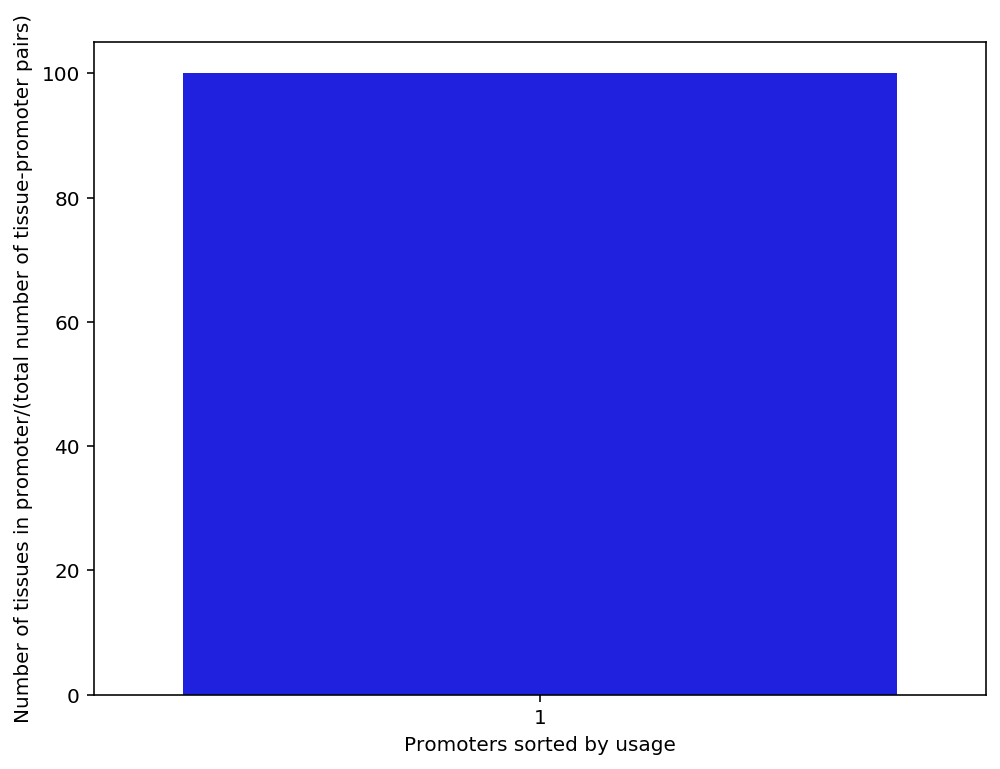

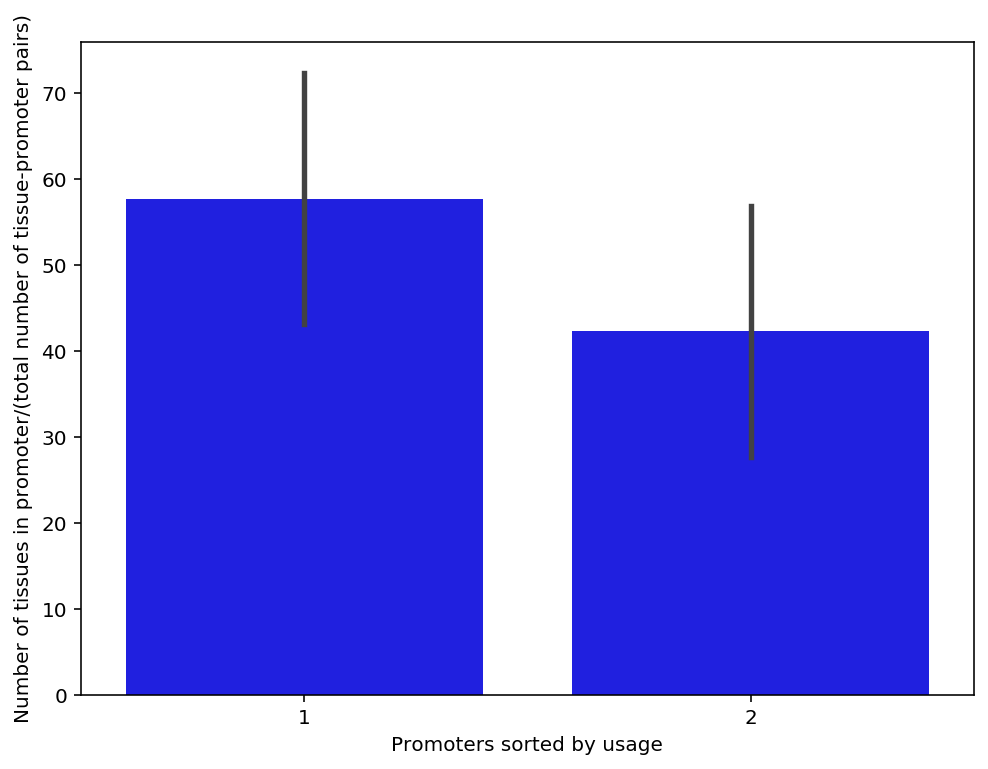

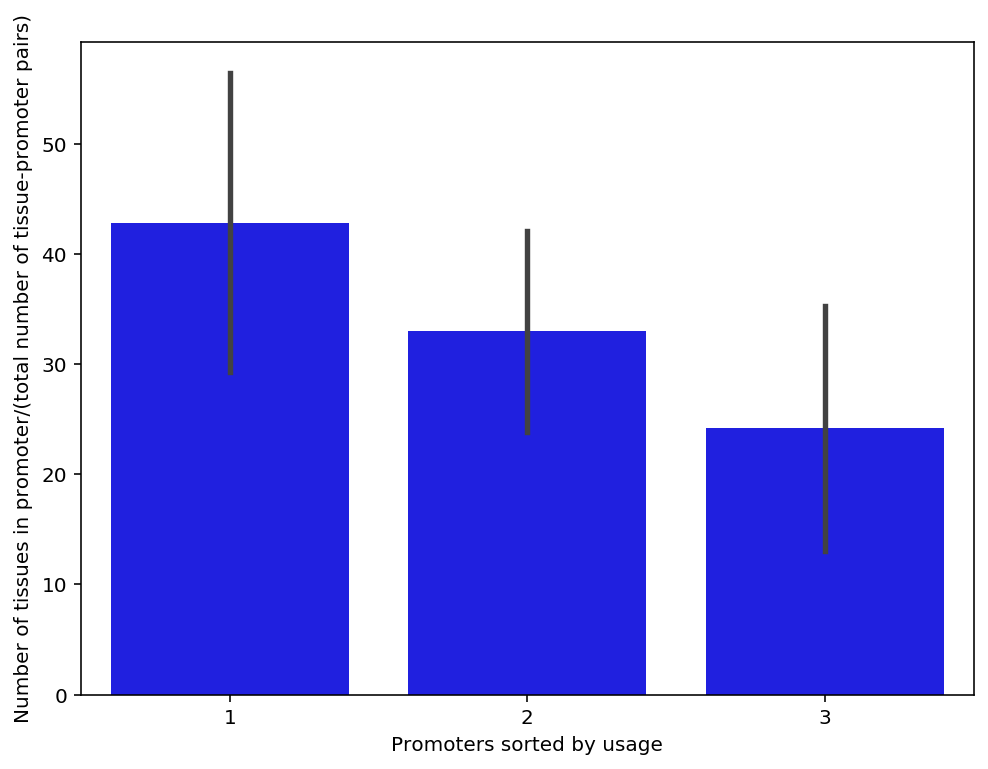

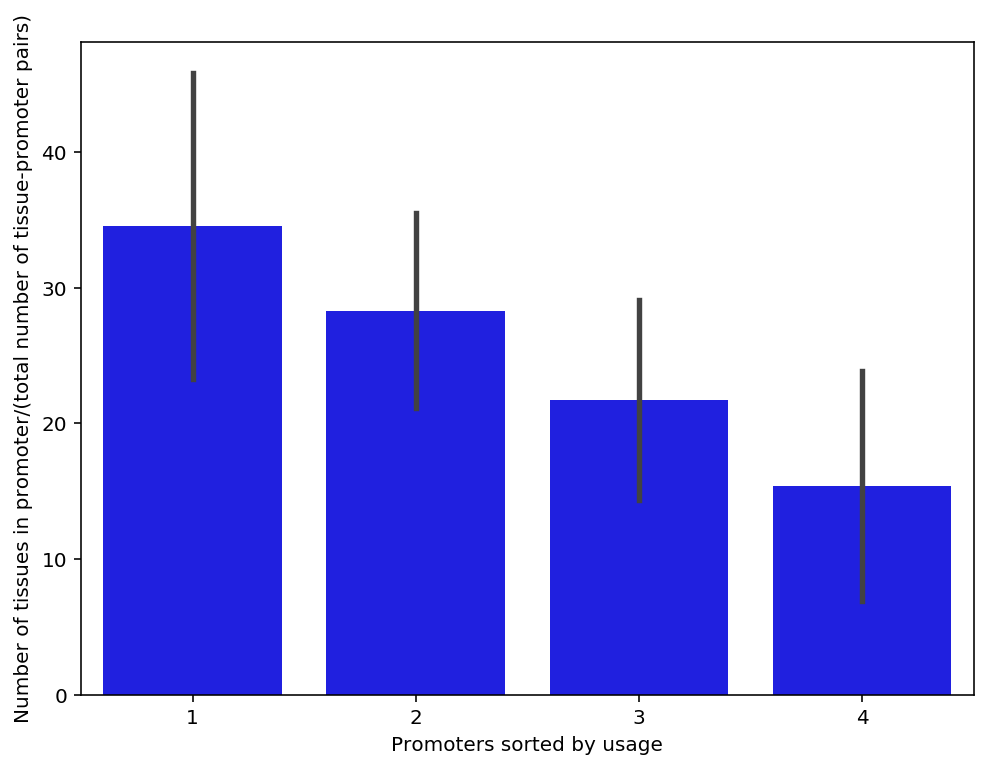

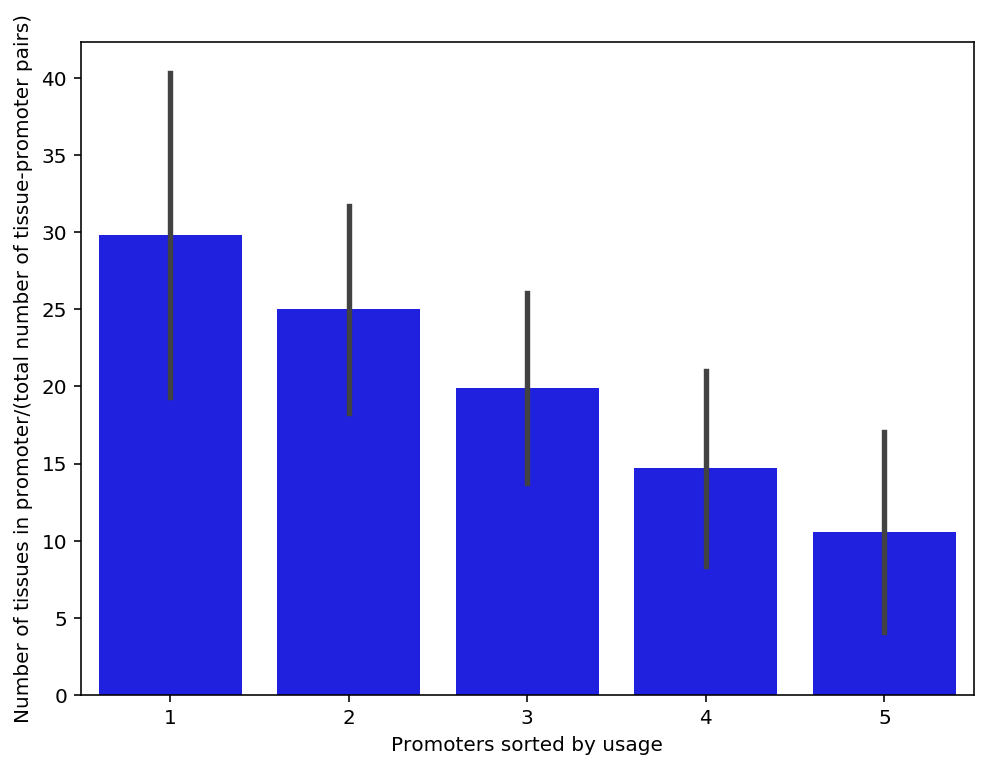

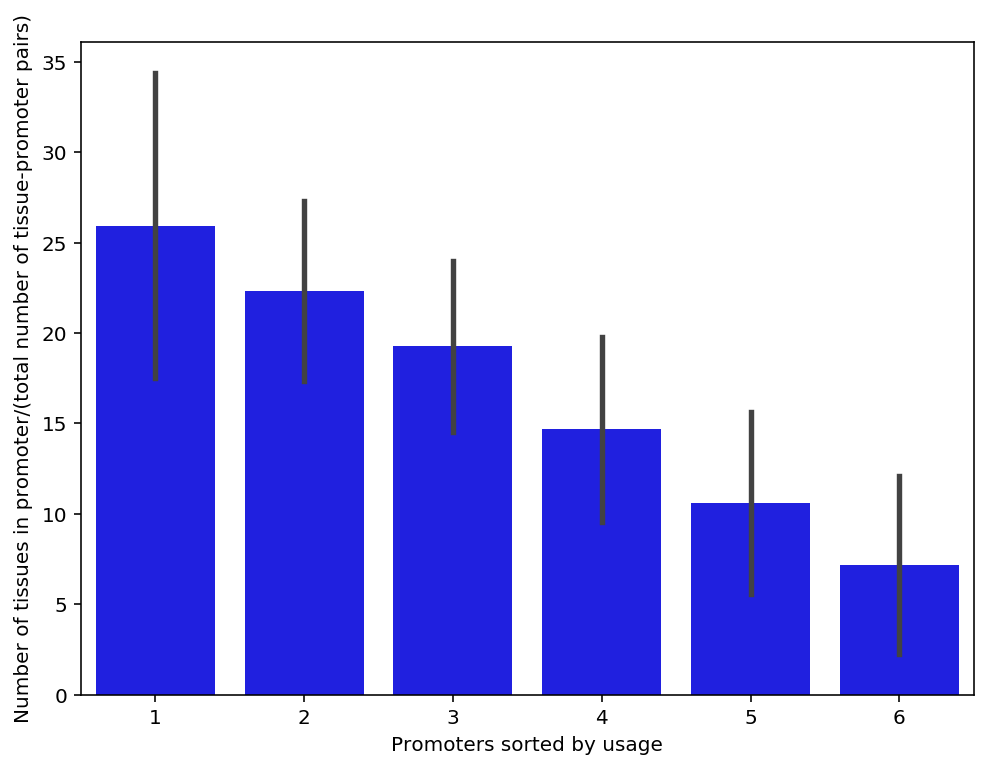

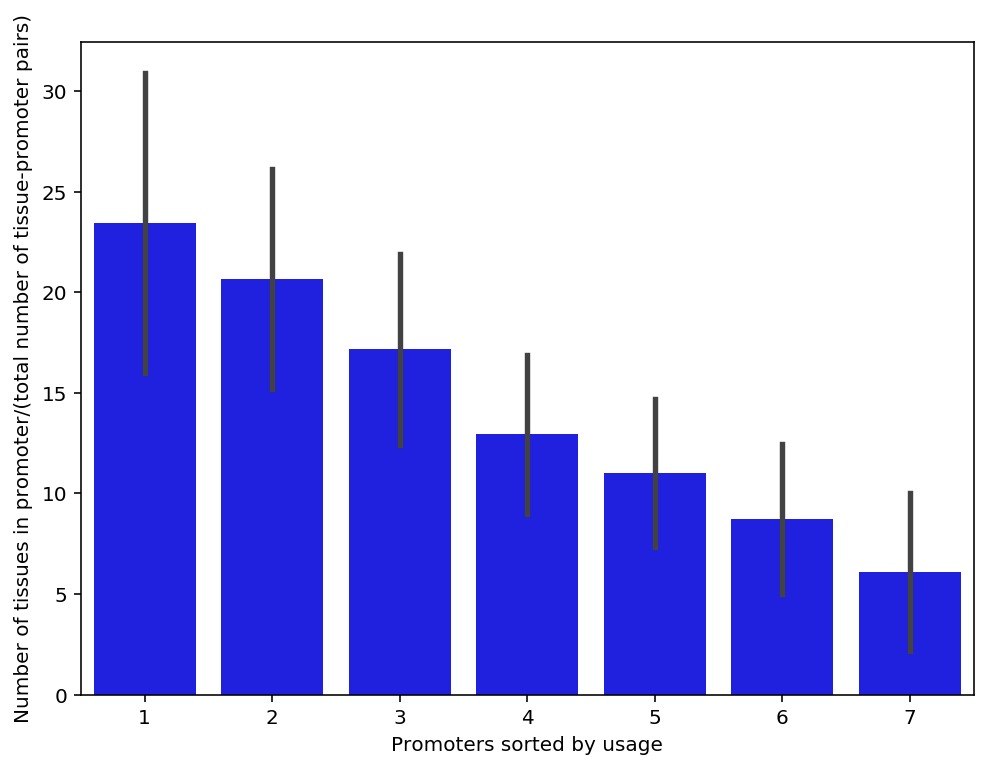

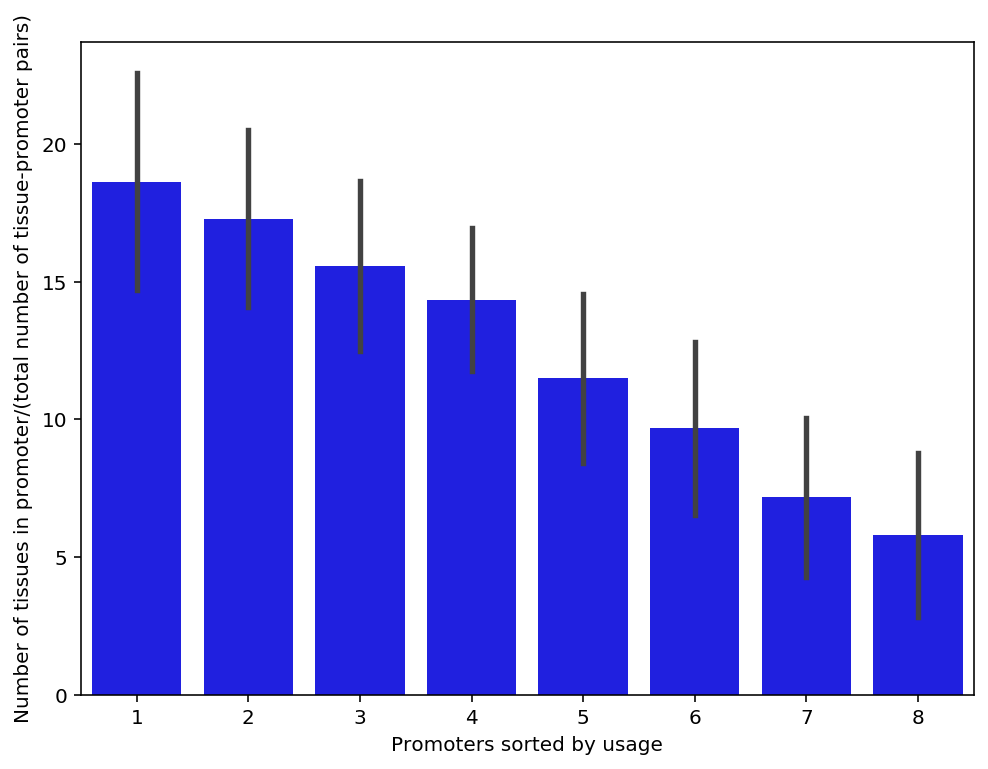

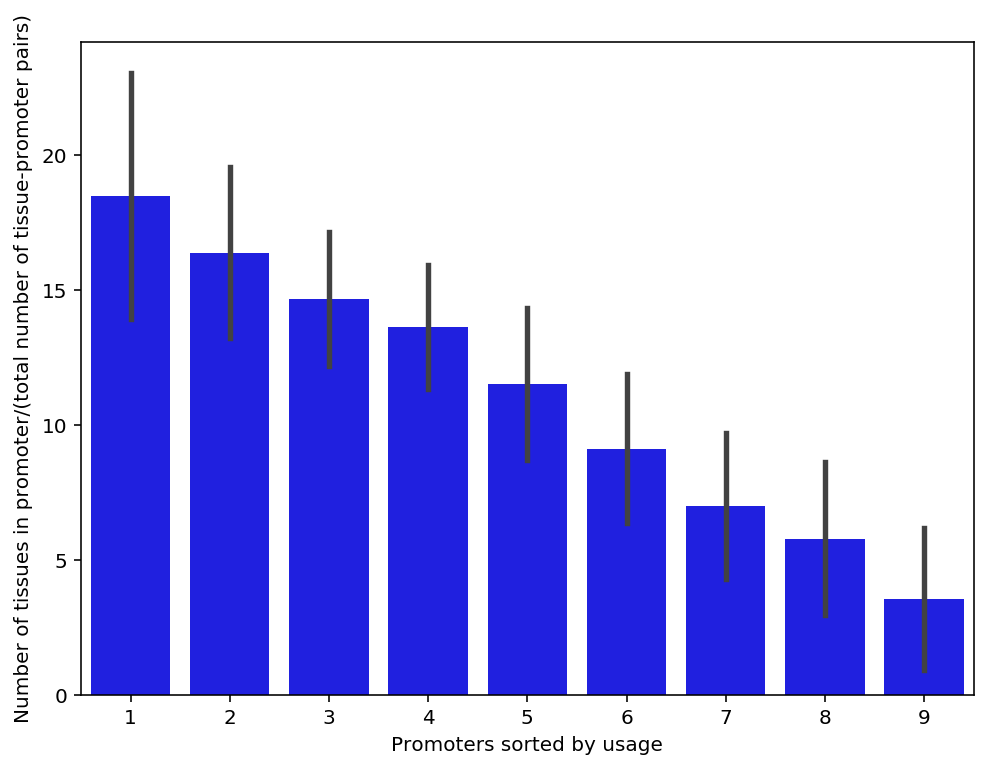

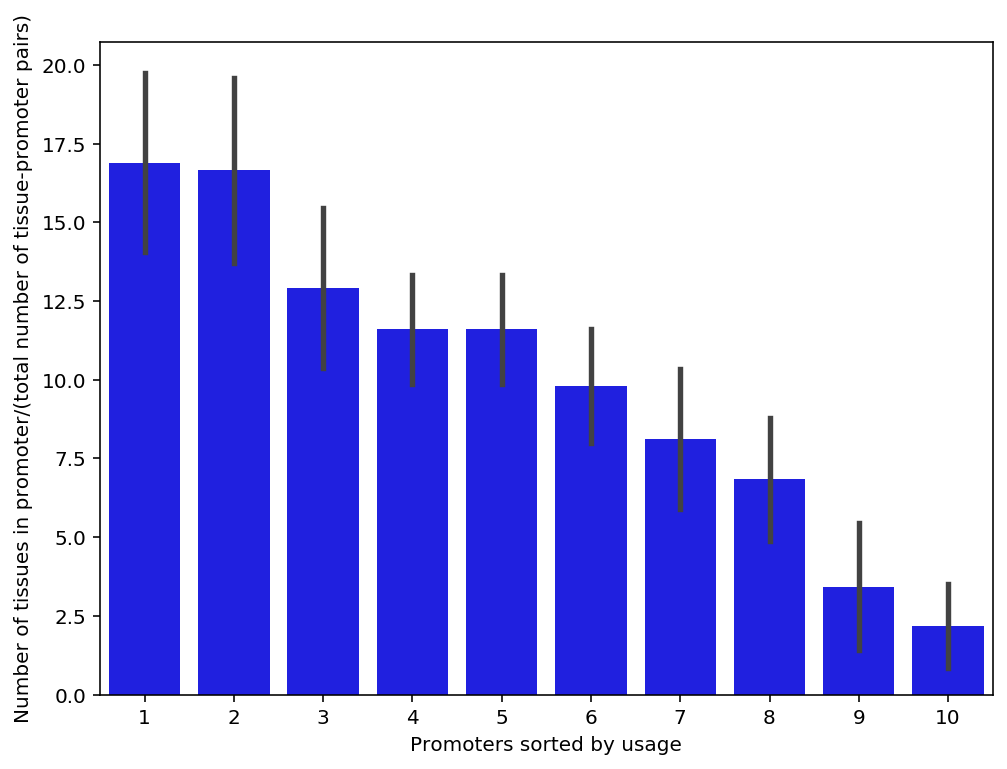

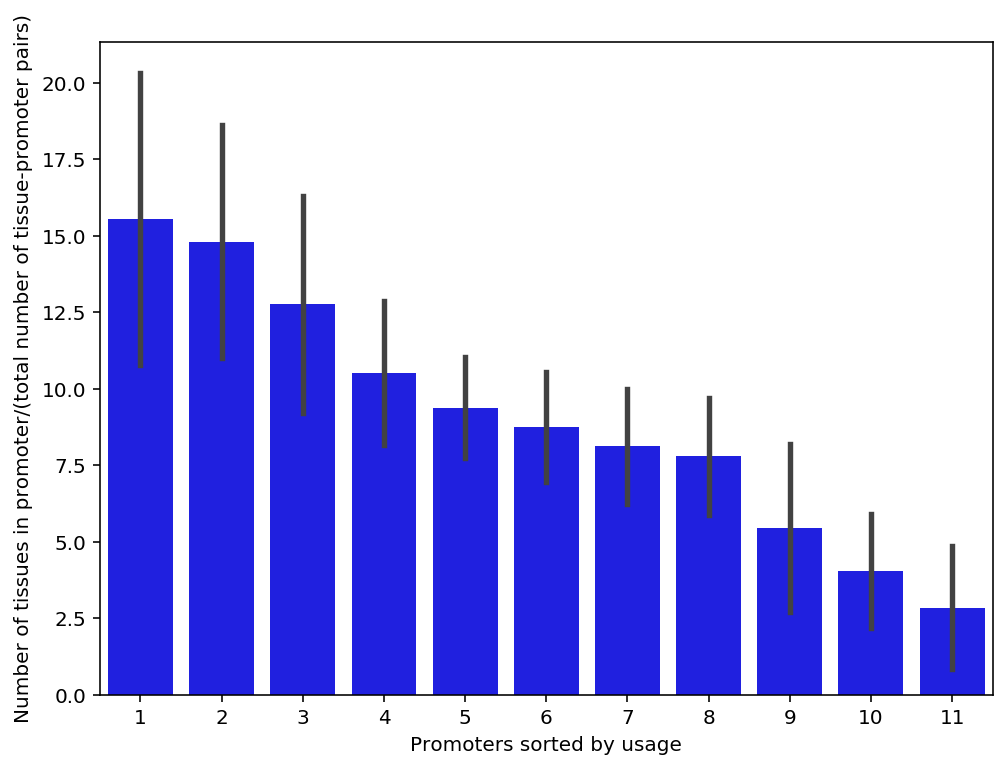

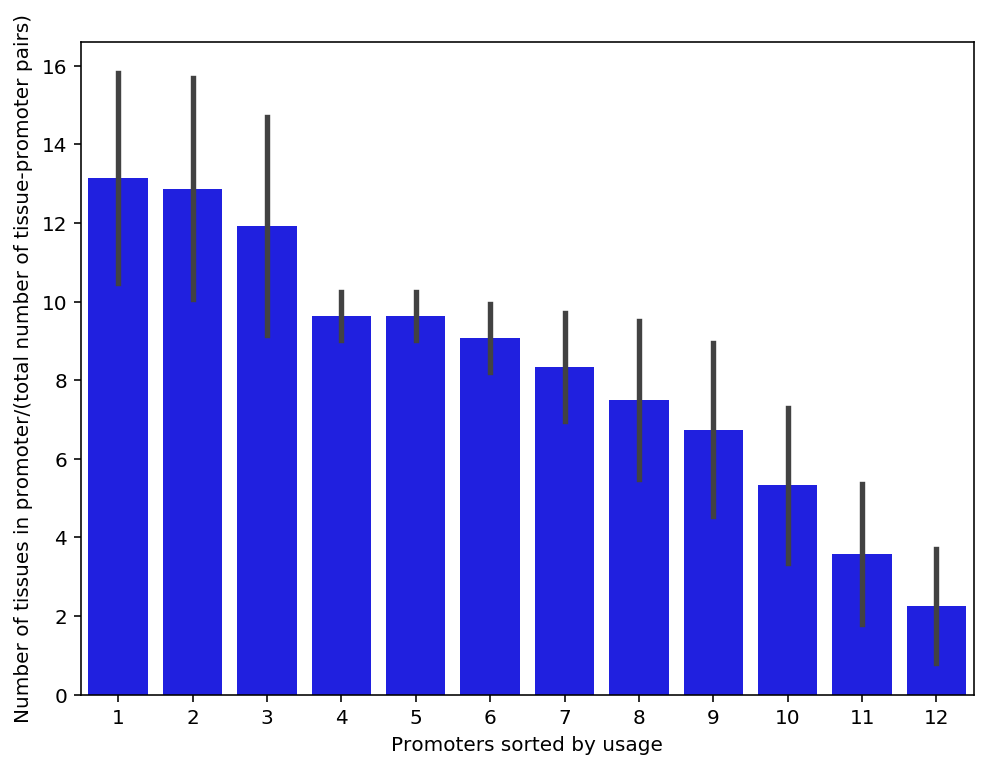

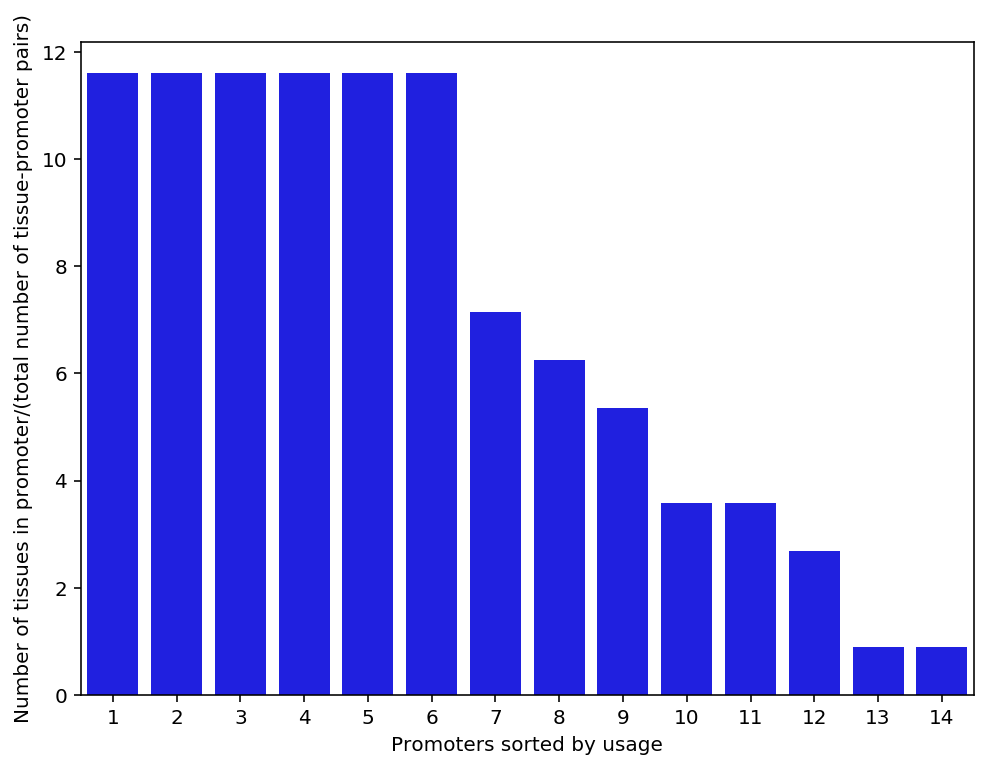

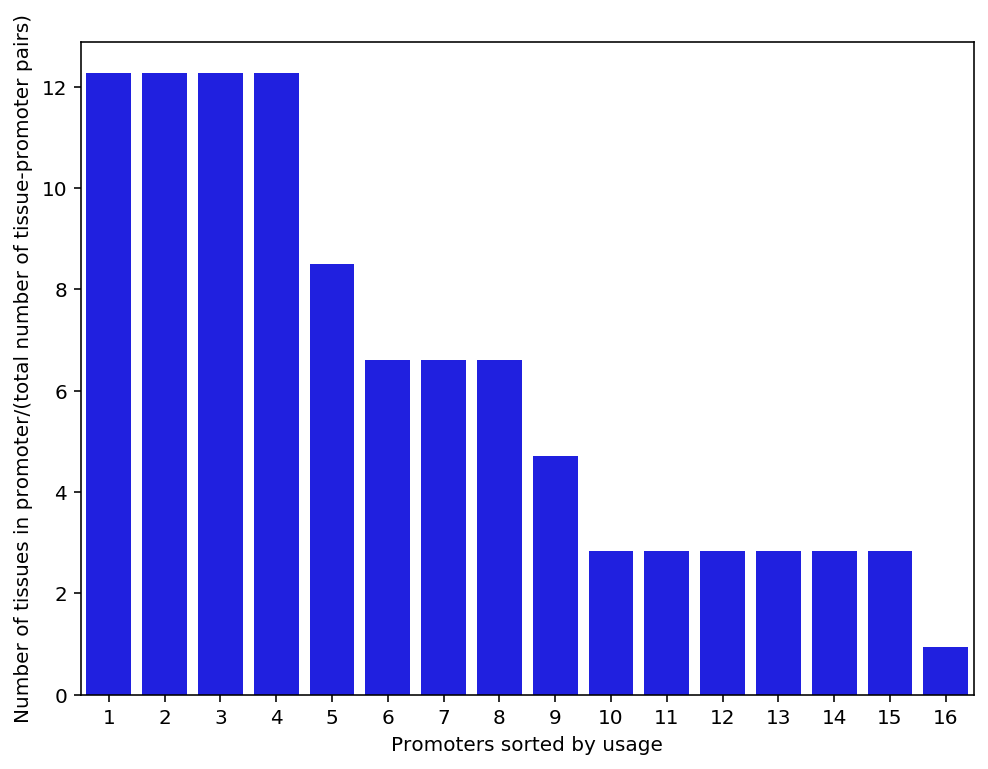

In [10]:
for ind, val in gene_alt_distribution_mat.groupby("Number of promoters", ):
    f = plt.figure()
#    print((1.0*val.astype(float))/val.astype(float)["Number of promoters"].values[0])
    sns.barplot(data=100*val.dropna(axis=1,how='any').astype(float).divide(val.drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1),
               color='blue', ci="sd")
    plt.xlabel("Promoters sorted by usage")
    plt.ylabel("Number of tissues in promoter/(total number of tissue-promoter pairs)")
    

In [11]:
from tss.visualize.fig_utils import helper_save

params {'PREFIX': 'ncbi_pice_103', 'ROOT_DIR': '/data/isshamie/TSS/', 'DATA_DIR': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'DATA_PROCESSED_DIR': '/data/isshamie/TSS/TSS/data/processed/', 'SUPPLEMENTAL_DIR': '/data/isshamie/TSS/Analysis/supplemental/', 'PIPELINE': '/data/isshamie/TSS/tss', 'GENOME_DIR': '/data/isshamie/genome', 'GENOME_FA': '/data/isshamie/genome/picr.fa', 'GENOME_GFF3': '/data/isshamie/genome/updated_final_sort.gff3', 'GENOME_GTF': '/data/isshamie/genome/updated_final_sort.gtf', 'TISSUES': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Intestine,', 'META_FILE': '/data/isshamie/TSS/TSS/parameters/raw_metaSamples.tsv'}


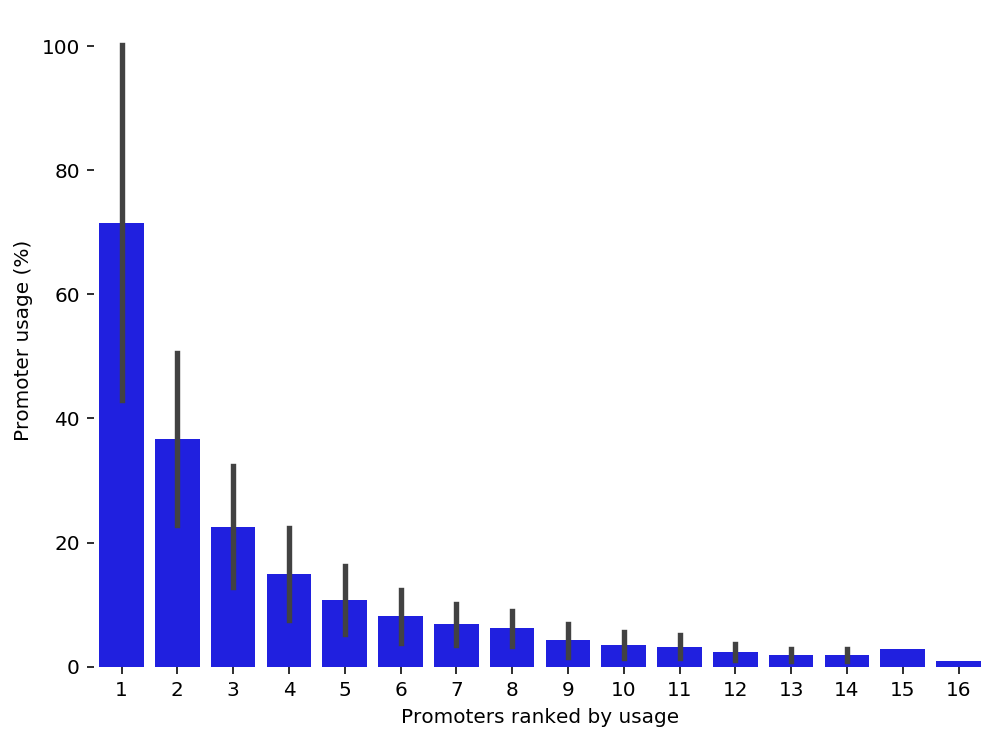

In [12]:
sns.barplot(data=100*gene_alt_distribution_mat.astype(float).divide(gene_alt_distribution_mat.drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1),
           color='blue', ci="sd")
plt.ylabel("Promoter usage (%)")
plt.xlabel("Promoters ranked by usage")
helper_save(join(save_dir,"promoter_usage_eTSS.png"))

### Only use rows when more than one promoter

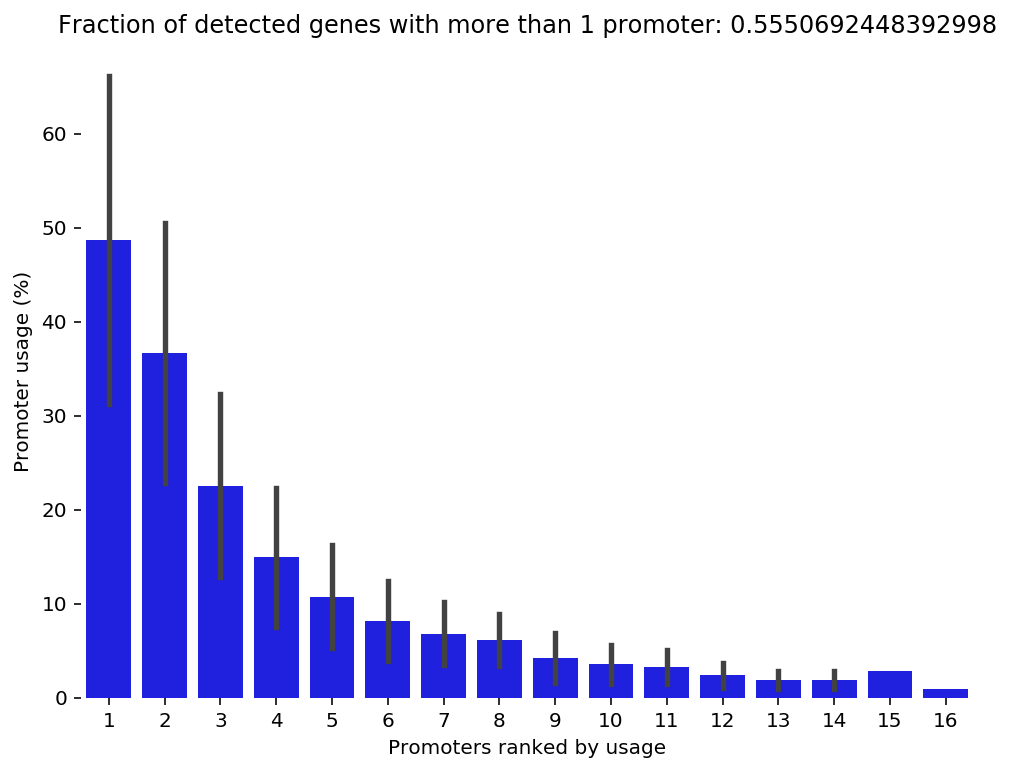

In [13]:
sns.barplot(data=100*gene_alt_distribution_mat[~(gene_alt_distribution_mat[2].isnull())].astype(float).divide(gene_alt_distribution_mat[~(gene_alt_distribution_mat[2].isnull())].drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1),
           color='blue', ci="sd")
plt.title(f"Fraction of detected genes with more than 1 promoter: {(~(gene_alt_distribution_mat[2].isnull())).sum()/gene_alt_distribution_mat.shape[0]}")
plt.ylabel("Promoter usage (%)")
plt.xlabel("Promoters ranked by usage")
helper_save(join(save_dir,"promoter_usage_moreThan1_eTSS.png"))

## Make entropy measure

In [14]:
from scipy.stats import entropy

(array([6811.,  750., 4053.,  700., 1779.,  736.,  334.,   99.,   37.,
           9.]),
 array([0.        , 0.25706211, 0.51412421, 0.77118632, 1.02824842,
        1.28531053, 1.54237264, 1.79943474, 2.05649685, 2.31355895,
        2.57062106]),
 <a list of 10 Patch objects>)

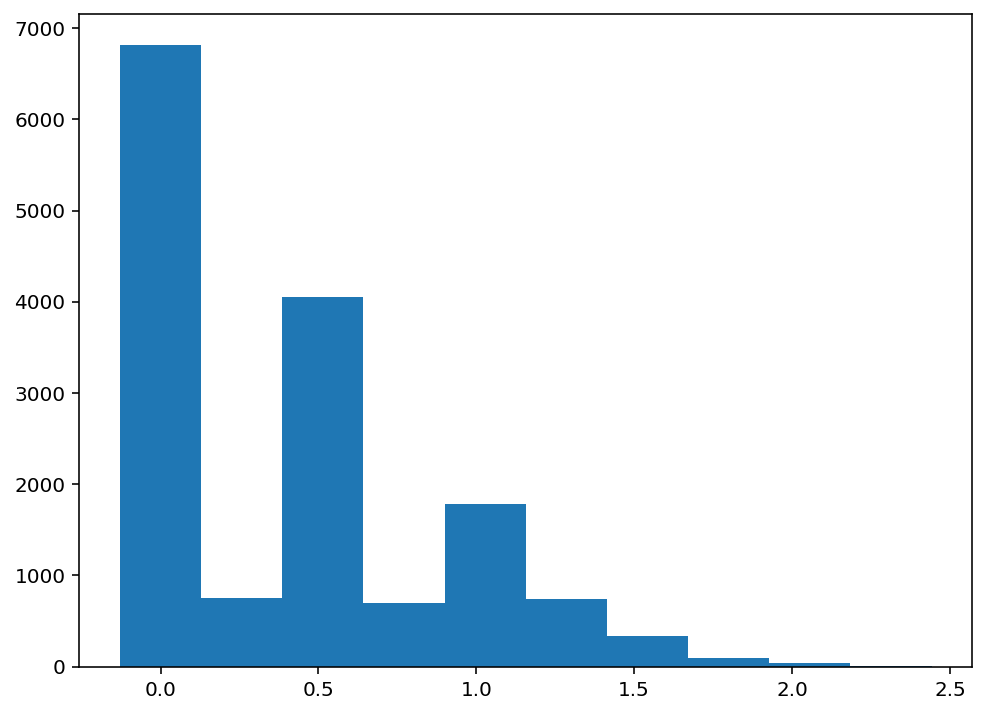

In [15]:
curr = gene_alt_distribution_mat.astype(float).divide(gene_alt_distribution_mat.drop("Number of promoters",axis=1).sum(axis=1).astype(float),axis='rows').drop("Number of promoters", axis=1)

plt.hist(curr.apply(lambda x: entropy(x.dropna()), axis=1), align='left')

In [16]:
from functools import reduce

## Get unique tissues for each gene

In [17]:
#df["Num Tissues"] = df["Tissues"].apply(lambda x: len(x.split(",")))

def combine_row_tissues(d):
    return len(set(reduce(lambda x, y: x+y, d.apply(lambda x: x.split(',')).values)))
    
gene_tis = df.groupby("Gene").agg({"Tissues": combine_row_tissues})
gene_tis

,Tissues
Gene,
A1cf,3
A4galt,11
Aaas,12
Aacs,13
Aadac,6
...,...
Zxdc,13
Zyg11b,13
Zyx,13


## Get how many tissues in each eTSS promoter

In [18]:
full_genes = gene_tis[gene_tis["Tissues"] == gene_tis["Tissues"].max()]
df_allTissues = df[df["Gene"].isin(full_genes.index)]
#full_genes
df_allTissues

,Tissues,cs,CHO ATAC Region,ID,Gene,Gene ID,Transcript,Is Experimental
p1@Cnih1_XM_027386534.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,298307,Cnih1,NaN,XM_027386534.1,1.0
p1@Cgrrf1_XM_027386536.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,348288,Cgrrf1,NaN,XM_027386536.1,1.0
p1@Gch1_XM_027386540.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,243948,Gch1,NaN,XM_027386540.1,1.0
p1@Socs4_XM_027386543.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,160861,Socs4,NaN,XM_027386543.1,1.0
p1@Mapk1ip1l_XM_027386545.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,475107,Mapk1ip1l,NaN,XM_027386545.1,1.0
...,...,...,...,...,...,...,...,...
p1@LOC113838541_XM_027434168.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,145836,LOC113838541,NaN,XM_027434168.1,1.0
p2@LOC113838541_XM_027434168.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b10,NaN,537728,LOC113838541,NaN,XM_027434168.1,1.0
p1@LOC113839047_XM_027434508.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,234286,LOC113839047,NaN,XM_027434508.1,1.0
p1@LOC113839076_XM_027434536.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,23577,LOC113839076,NaN,XM_027434536.1,1.0


In [19]:
df_allTissues["Number of Tissues"] = df_allTissues["Tissues"].apply(lambda x: len(x.split(",")))

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Only take eTSS with all tissues in gene. 

In [30]:
(tissue_expr.loc[df_allTissues["ID"]]>0).sum(axis=1)==13

298307     True
348288     True
243948     True
160861     True
475107     True
          ...  
145836    False
537728    False
234286     True
23577      True
137781    False
Length: 11824, dtype: bool

In [35]:
df_allTissues.to_csv(join(save_dir, "eTSS_allTissues"), sep="\t")

    index         0
12     13  0.391746
11     12  0.058525
10     11  0.033407
9      10  0.019537
8       9  0.019875
7       8  0.016323
6       7  0.019875
5       6  0.020382
4       5  0.025626
3       4  0.032476
2       3  0.042287
1       2  0.083643
0       1  0.236299


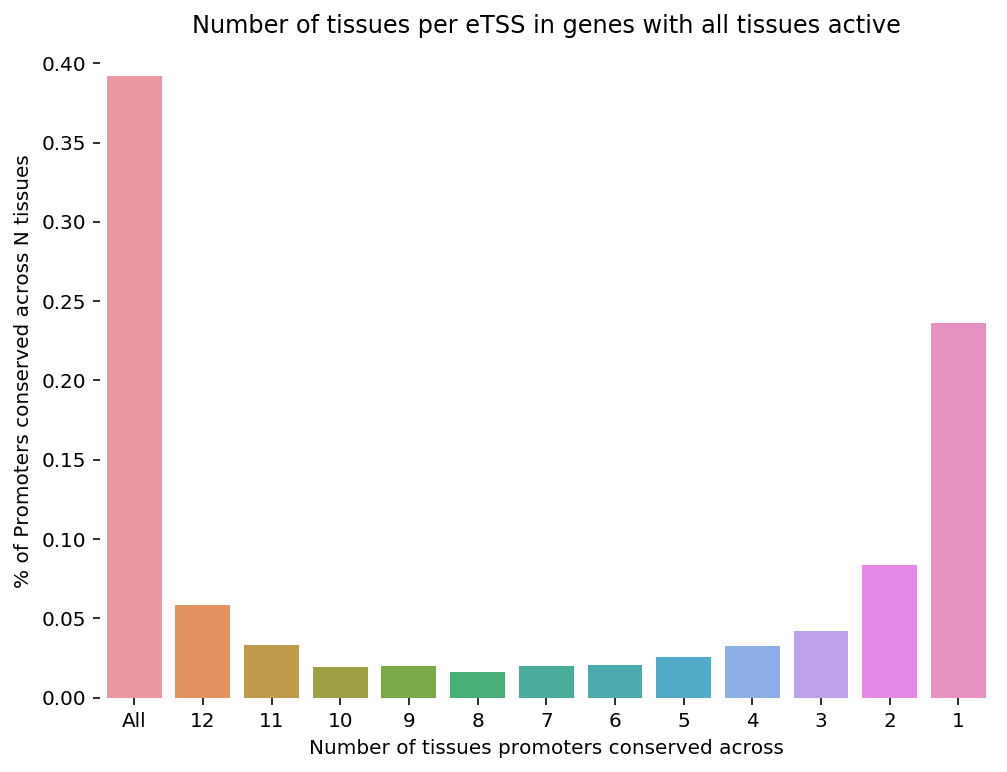

In [26]:
#sns.countplot((tissue_expr.loc[df_allTissues["ID"]]>0).sum(axis=1))
counts = ((tissue_expr.loc[df_allTissues["ID"]]>0).sum(axis=1).value_counts(normalize=True, sort=False)).sort_index().reset_index()[::-1]
print(counts)
#counts
sns.barplot(x='index', y =counts[0], data=counts, order=counts['index'])
#ax = sns.barplot(x="x", y="x", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title("Number of tissues per eTSS in genes with all tissues active")
plt.xlabel("Number of tissues promoters conserved across")
plt.ylabel("% of Promoters conserved across N tissues")
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = "All"
plt.gca().set_xticklabels(labels)
helper_save(join(save_dir,"tissues_per_eTSS_inGenesWithAllTissues.png"))

In [46]:
df_allTissues

,Tissues,cs,CHO ATAC Region,ID,Gene,Gene ID,Transcript,Is Experimental,Number of Tissues
p1@Cnih1_XM_027386534.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,298307,Cnih1,NaN,XM_027386534.1,1.0,13
p1@Cgrrf1_XM_027386536.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,348288,Cgrrf1,NaN,XM_027386536.1,1.0,13
p1@Gch1_XM_027386540.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,243948,Gch1,NaN,XM_027386540.1,1.0,13
p1@Socs4_XM_027386543.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,160861,Socs4,NaN,XM_027386543.1,1.0,13
p1@Mapk1ip1l_XM_027386545.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,475107,Mapk1ip1l,NaN,XM_027386545.1,1.0,13
...,...,...,...,...,...,...,...,...,...
p1@LOC113838541_XM_027434168.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,145836,LOC113838541,NaN,XM_027434168.1,1.0,13
p2@LOC113838541_XM_027434168.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b10,NaN,537728,LOC113838541,NaN,XM_027434168.1,1.0,13
p1@LOC113839047_XM_027434508.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,234286,LOC113839047,NaN,XM_027434508.1,1.0,13
p1@LOC113839076_XM_027434536.1,"BMDMwt,Brain,Spleen,BMDM1hKLA,Lung,CHO,Pancrea...",0b11,NaN,23577,LOC113839076,NaN,XM_027434536.1,1.0,13


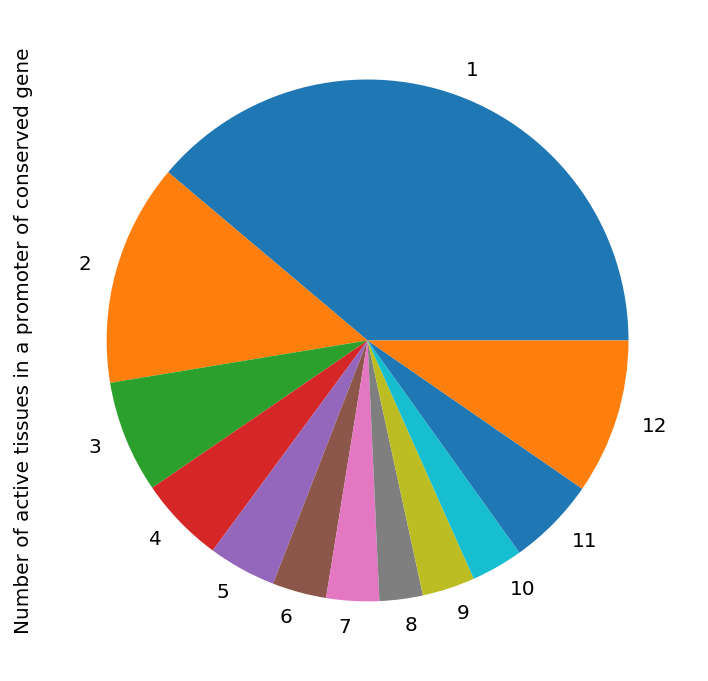

In [48]:
pie = ((tissue_expr.loc[df_allTissues["ID"]]>0).sum(axis=1).value_counts(normalize=False, sort=False)).sort_index().drop(13)
pie.name = "Number of active tissues in a promoter of conserved gene"
pie.plot.pie()

helper_save(join(save_dir,"pie_promotersInGenesWithAllTissues.png"))

In [49]:
pie

1     2794
2      989
3      500
4      384
5      303
6      241
7      235
8      193
9      235
10     231
11     395
12     692
Name: Number of active tissues in a promoter of conserved gene, dtype: int64

In [55]:
names

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


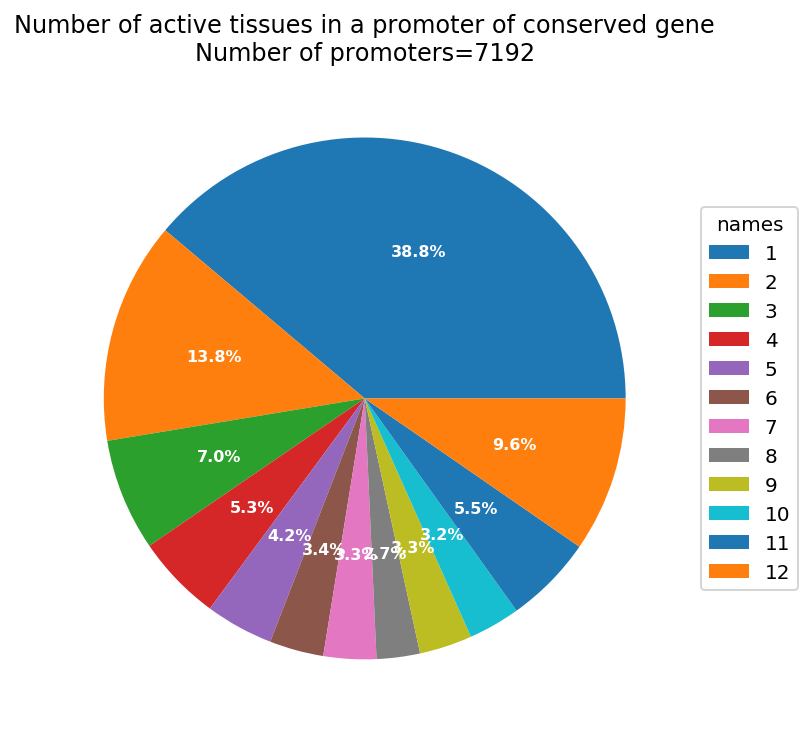

In [63]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

data = pie.values
names = pie.index.values

# data = [float(x.split()[0]) for x in recipe]
# names = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, names,
          title="names",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title(f"Number of active tissues in a promoter of conserved gene\nNumber of promoters={data.sum()}")

plt.show()

## TSS 
### Second blot. Here you can just take "all genes expressed" in sense that the same gene in different tissues is counted independently - let's say Rplp1, which is expressed in every tissue, would occoure 14 times. Then simply plot, how many promoters a gene has (% y axis) and number 1,2,3,4,5...(n) on the x axis.

In [21]:
len(df[df["Gene"] == "Rplp1"]["Tissues"][0].split(","))


13

Text(0, 0.5, 'Number of genes')

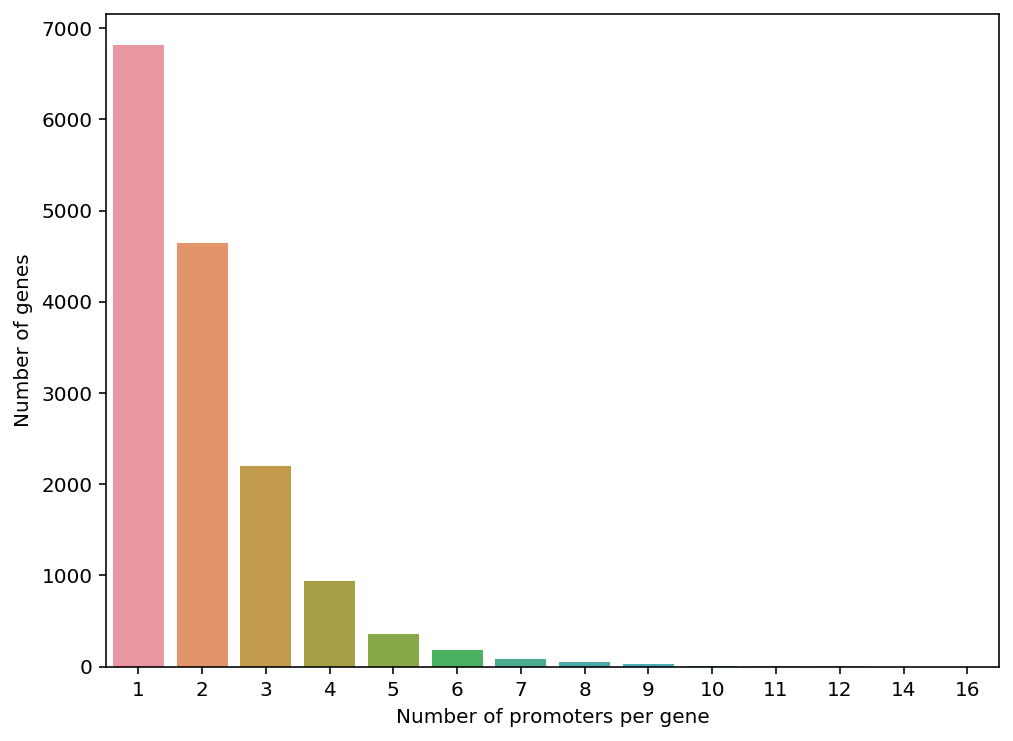

In [22]:
sns.countplot(df.groupby("Gene").size())
plt.xlabel("Number of promoters per gene")
plt.ylabel("Number of genes")

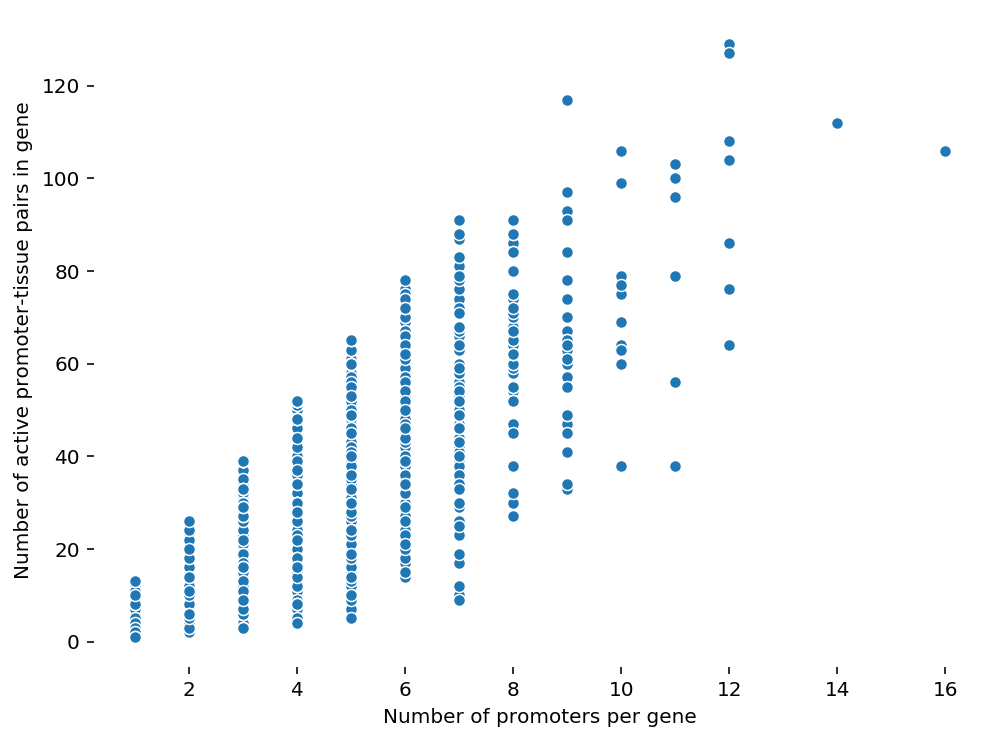

In [23]:
df["Number of Tissues"] = df["Tissues"].apply(lambda x: len(x.split(",")))
genes = pd.DataFrame(df.groupby("Gene").size())
genes = genes.rename({0:"Number of TSS in a gene"}, axis=1)
genes["Number of active promoter-tissue pairs in gene"] = df.groupby("Gene").sum()["Number of Tissues"]
genes = pd.concat((genes, gene_tis), axis=1)
#genes
sns.scatterplot(genes["Number of TSS in a gene"], genes["Number of active promoter-tissue pairs in gene"])
plt.xlabel("Number of promoters per gene")
plt.ylabel("Number of active promoter-tissue pairs in gene")
helper_save(join(save_dir,"scatter_tssTissuePairs_numberPromoters.png"))

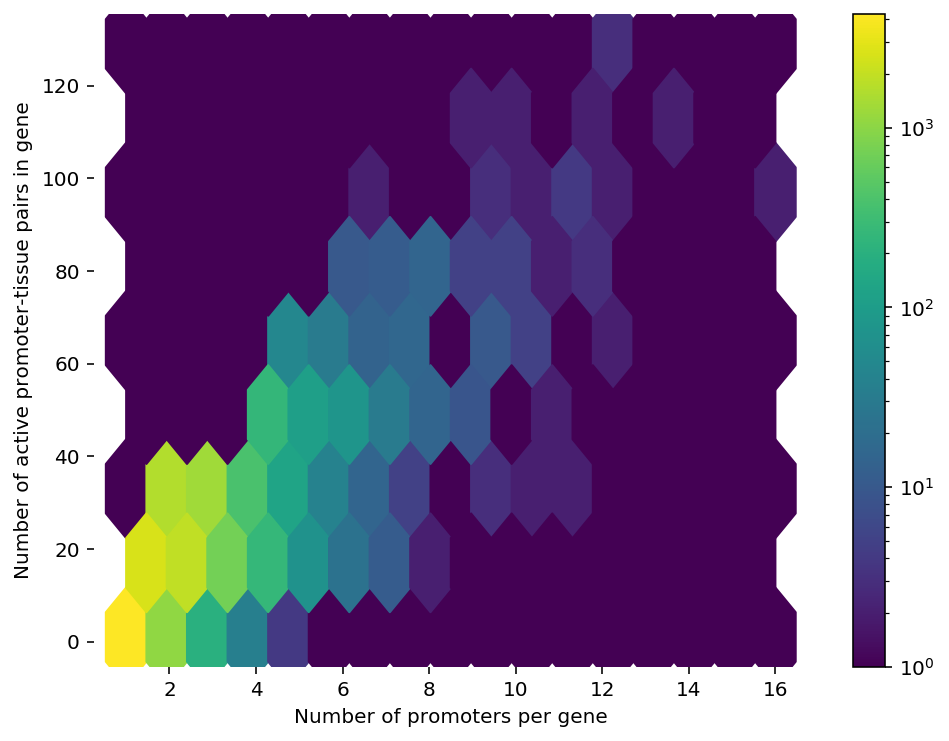

In [24]:
df["Number of Tissues"] = df["Tissues"].apply(lambda x: len(x.split(",")))
genes = pd.DataFrame(df.groupby("Gene").size())
genes = genes.rename({0:"Number of TSS in a gene"}, axis=1)
genes["Number of active promoter-tissue pairs in gene"] = df.groupby("Gene").sum()["Number of Tissues"]
genes = pd.concat((genes, gene_tis), axis=1)
#genes
#sns.scatterplot(genes["Number of TSS in a gene"], genes["Number of active promoter-tissue pairs in gene"])
f, ax = plt.subplots()
hb = ax.hexbin(genes["Number of TSS in a gene"], genes["Number of active promoter-tissue pairs in gene"], bins='log', gridsize=(16,
                                                                                                               int(max(genes["Number of TSS in a gene"])/4)))
plt.colorbar(hb)
plt.xlabel("Number of promoters per gene")
plt.ylabel("Number of active promoter-tissue pairs in gene")
helper_save(join(save_dir,"hex_tssTissuePairs_numberPromoters.png"))

In [25]:
sns.scatterplot(x="Number of TSS in a gene", y="Number of TSS-tissue pairs",
                data=genes[genes["Tissues"]==max(genes["Tissues"])])

ValueError: Could not interpret input 'Number of TSS-tissue pairs'

In [ ]:
f, ax = plt.subplots()
hb = ax.hexbin(genes["Number of TSS in a gene"], genes["Tissues"], gridsize=(16,13),bins='log')
plt.colorbar(hb)
plt.xlabel("Number of TSS in a gene")
plt.ylabel("Tissues")

In [ ]:
sns.countplot((tissue_expr.loc[df["ID"]]>0).sum(axis=1))
plt.title("Number of tissues per eTSS across all genes")
plt.xlabel("Number of tissues with promoter")
plt.ylabel("Number of promoters")
helper_save(join(save_dir,"tissues_per_eTSS_allGenes.png"))

#
-Conserved versus activity

-Promoter conserved- active across tissues. 

-ALL tissues - this is evidence for that promoters change: They are using different promoters to activate the same gene

 Conserved and Change across tissues. (2 bar graphs). We could then include the extra information and maybe you can make a piechart of the values from 12-1 (excluding the all) that we can link to the "change" for more info of how many tissues have the changed TSS. does that make sense?


?promoter vs TSS?

-perhaps no we can make a plot of those saying which have identical strongest TSS, and which ones differ by how far - sort of a distplot with a 10bp binning. That would show that even if the TSR/Promoter is conserved, the main TSS may not be.




:IGV- which reads to include? 
:motifs- 



I'll just send while we figure out S4